**Import the libraries**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [2]:
a=pd.read_csv("revenue_prediction.csv")

In [3]:
a.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


**Examining missing values in a dataset**

In [4]:
a.isnull().sum().sum()

0

In [5]:
# Checking Duplicate value

a.duplicated().sum()

0

In [6]:
a['Revenue'].describe()

count    1.000000e+02
mean     4.395161e+06
std      2.659932e+06
min      8.498700e+05
25%      2.688328e+06
50%      3.911401e+06
75%      5.330084e+06
max      1.969694e+07
Name: Revenue, dtype: float64

In [7]:
a['Revenue'].value_counts()

5953753    1
1619683    1
3347767    1
2525375    1
4136425    1
          ..
2408199    1
2447890    1
7705945    1
6135276    1
4567678    1
Name: Revenue, Length: 100, dtype: int64

**Drop irrelevant columns**

In [8]:
a=a.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"])

In [9]:
a.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [10]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_Placed  100 non-null    float64
 1   Revenue       100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [11]:
a.shape

(100, 2)

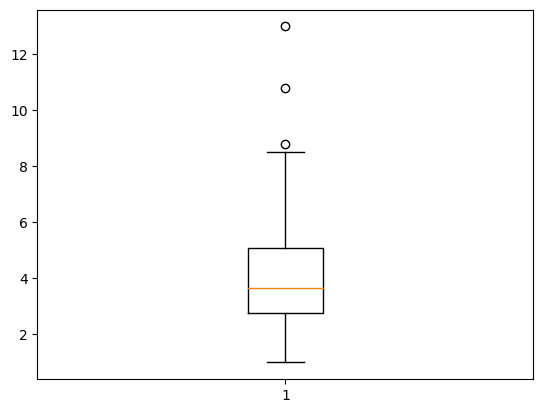

In [12]:
# Checking the outliers

plt.boxplot(a['Order_Placed'])
plt.show()

In [13]:
a.columns

Index(['Order_Placed', 'Revenue'], dtype='object')

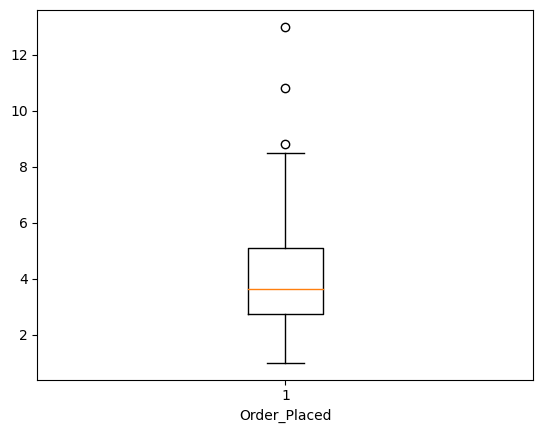

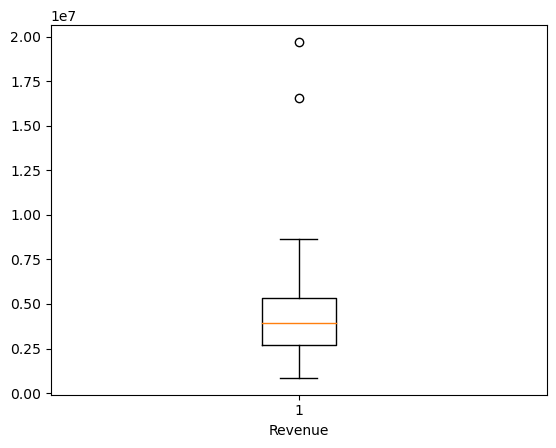

In [14]:
for col in a.columns:                       # col has been defined as a.columns with for loop
    if a[col].dtype != "object":
        plt.boxplot(a[col])
        plt.xlabel(col)
        plt.show()

In [15]:
out_col = ['Order_Placed','Revenue']

In [16]:
for col in out_col:                # col has been defined as out_col with for loop
  Q1 = a[col].quantile(0.25)
  Q3 = a[col].quantile(0.75)
  IQR = Q3 - Q1 
  LW = Q1 - 1.5*IQR   #Lower whisker
  UW = Q3 + 1.5*IQR    #Upper whisker
  a = a[(a[col]>=LW) & (a[col]<=UW)]

In [17]:
a.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


## Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
for col in a.columns:
  if a[col].dtype == "object":
    a[col] = le.fit_transform(a[col])

In [21]:
a.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


<Axes: >

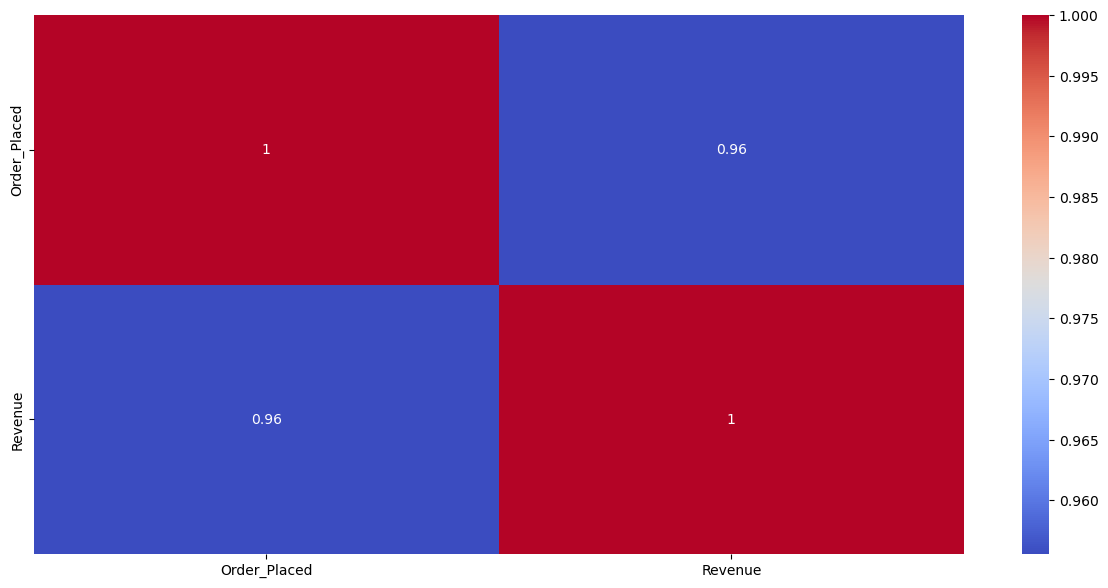

In [22]:
plt.figure(figsize=(15,7))

sns.heatmap(a.corr(),annot=True,cmap="coolwarm")

# Model Building

**Create independent feature and dependent variable**

In [23]:
a.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [24]:
#splitting the data into independent and dependent feature

x = a.iloc[:,:1]
x

,Order_Placed
0,5.5
1,6.8
2,1.9
3,2.5
4,4.2
...,...
95,1.1
96,6.3
97,6.2
98,2.1


In [25]:
y=a['Revenue']   # Target variable

In [26]:
y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 97, dtype: int64

In [27]:
#splitting the data into train and test data

from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# Choosing Machine Learning Algorithm as Linear Regression

In [29]:
# Building Standard scaler on X_train & X_test

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [30]:
# Building the model on train set

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
# Predicting the value on test set

y_predict=lr.predict(x_test)

In [32]:
difference=pd.DataFrame(np.c_[y_test, y_predict], columns=['Actual Value', 'Predicted Value'])
difference

,Actual Value,Predicted Value
0,2551252.0,2.572028e+06
1,4952255.0,4.987584e+06
2,6412623.0,6.497306e+06
3,1521934.0,2.068787e+06
4,4250553.0,4.081750e+06
5,3351383.0,3.276565e+06
6,1882131.0,1.867491e+06
7,4264176.0,4.182399e+06
8,3945135.0,3.779806e+06
9,5953753.0,5.692121e+06


In [33]:
from sklearn.metrics import *

print('Mean Absolute Error:', mean_absolute_error(y_test,y_predict))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test,y_predict))
mse=mean_squared_error(y_test,y_predict)
print('Mean Squared Eror:', mse)
rmse=np.sqrt(mse)
print('Root Mean Sqaured Error:', rmse)
print('R2 Score:', r2_score(y_test,y_predict))

Mean Absolute Error: 333797.8167188473
Mean Absolute Percentage Error: 0.08784772478055765
Mean Squared Eror: 449660790985.3591
Root Mean Sqaured Error: 670567.5141142457
R2 Score: 0.8379154385192807


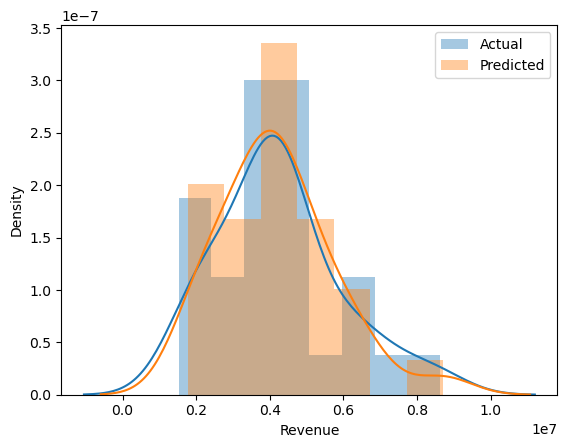

In [34]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_predict, label='Predicted')
plt.legend()
plt.show()

**Observation: As indicated by the target variable ‘Revenue’, suggests a positive trajectory, forecasting continued growth in alignment with current trends. This predictive insight offers valuable foresight into future revenue streams, empowering data-driven decision-making.**